Free Particle Probability Distribution: Write a program that computes and plots
the free-particle probability distribution P (x, t) = |ψ(x, t)|^2 versus x for various values
of t (Eq. 9.44 in Garcia). Produce a plot comparing your results to the output from
the schro.py program.

In [1]:
import numpy as np
import scipy.constants as sp
import math
import matplotlib.pyplot as plt

In [15]:
#h_m = sp.hbar/sp.m_e           #h_bar over mass of electron
h_m = 1.0

def prob_density(x0, x, t, sig, k0):
    A2 = np.sqrt(sig**4 + t**2)
    Prob_xt = (sig/math.sqrt(np.pi)/(A2)
                      )*math.exp(-1*(sig**4/(A2)**2)*((x-x0-h_m*k0*t)/sig)**2)   #(Eq 9.44, Garcia)
    return Prob_xt             

Text(0.5, 1.0, 'Probability Density Functions over Position and Time')

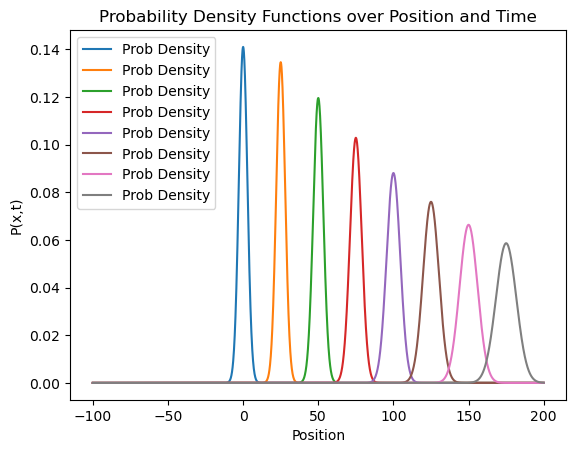

In [51]:
x0 = 0.0
t0 = 0.0    #set initial conditions
k0 = 5.0
sig0 = 4.0  #initial packet width

x_min = -100.0
x_max = 200.0      #variables for the for-loop

dx = .1
ngrid = 3001

xtemp = x_min
ttemp = t0

P_plot = np.zeros((ngrid,8))     #arrays for plotting data
x_plot = np.zeros(ngrid)

for k in range(8):

    for i in range(ngrid): #span range of xmin to xmax
        x_plot[i] = xtemp
        P_plot[i,k] = prob_density(x0, xtemp, ttemp, sig0, k0)  
        xtemp = xtemp + dx
    
    #plt.plot(x_plot, P_plot)
    xtemp = x_min
    ttemp = ttemp + 5
    
plt.plot(x_plot, P_plot, label='Prob Density')
plt.xlabel('Position')
plt.ylabel('P(x,t)')
plt.title('Probability Density Functions over Position and Time')



enter number of grid points: 100
Enter time step: .1
Finished 249 of 2000 iterations.
WF Norm: 1.00
Finished 499 of 2000 iterations.
WF Norm: 1.00
Finished 749 of 2000 iterations.
WF Norm: 1.00
Finished 999 of 2000 iterations.
WF Norm: 1.00
Finished 1249 of 2000 iterations.
WF Norm: 1.00
Finished 1499 of 2000 iterations.
WF Norm: 1.00
Finished 1749 of 2000 iterations.
WF Norm: 1.00
Finished 1999 of 2000 iterations.
WF Norm: 1.00


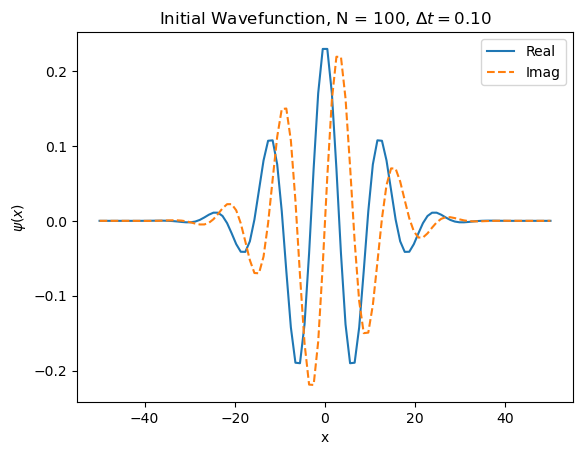

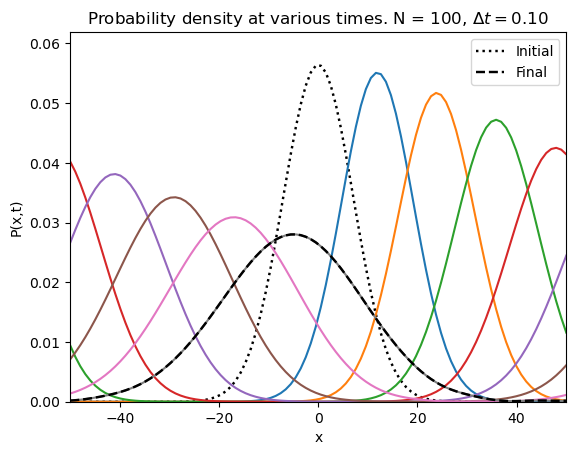

In [35]:

# Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j  # imaginary i in Python
N = eval(input('enter number of grid points: '))
L = 100.0  # System extends from -L/2 to L/2
dx = L/(N-1)  # Grid size
x = np.arange(N)*dx - L/2.0  # Coordinates of grid points.
hbar = 1.0  # Natural units
mass = 1.0  # Natural units
dt = eval(input('Enter time step: '))

# Set up the Hamiltonian operator matrix
ham = np.zeros((N, N))  # Set all elements to zero.
coeff = -hbar**2/(2*mass*dx**2)

for i in range(1, N-1):
    ham[i, i-1] = coeff
    ham[i, i] = -2*coeff  # Set interior rows
    ham[i, i+1] = coeff

# First and last rows for periodic boundary conditions
ham[0, -1] = coeff
ham[0, 0] = -2*coeff
ham[0, 1] = coeff

ham[-1, -2] = coeff
ham[-1, -1] = -2*coeff
ham[-1, 0] = coeff

# Compute the Crank-Nicolson Matrix
dCN = np.dot(np.linalg.inv(np.identity(N) + 0.5*i_imag*dt/hbar*ham), (np.identity(N) - 0.5*i_imag*dt/hbar*ham))

# Initialize the wavefunction
x0 = 0.0  # Location of the center of the wavepacket
velocity = 0.5  # Average velocity of the packet
k0 = mass*velocity/hbar  # Average wavenumber
sigma0 = L/10.0  # Standard deviation of the wavefunction
Norm_psi = 1.0/np.sqrt(sigma0*np.sqrt(np.pi))
psi = np.empty(N, dtype=complex)  # Initialize wavefunction as an array

for q in range(N):
    psi[q] = Norm_psi * np.exp(i_imag*k0*x[q]) * np.exp(-(x[q]-x0)**2/(2*sigma0**2))

# Plot the initial wavefunction
fig, ax = plt.subplots()
ax.plot(x, np.real(psi), ls='-', label='Real')
ax.plot(x, np.imag(psi), ls='--', label='Imag')
ax.set_xlabel('x')
ax.set_ylabel(r'$\psi(x)$')
ax.set_title(r'Initial Wavefunction, N = {0:d}, $\Delta t = ${1:.2f}'.format(N, dt))
ax.legend()

# plt.show()

# Initialize loop and plotting variables
max_iter = int(L/(velocity*dt) + 0.5)  # Max iterations such that the particle circles the system at least once
plot_iter = max_iter/8
p_plot = np.empty((N, max_iter+1))  # Note probability density P(x,t) is real
p_plot[:, 0] = np.abs(psi)**2  # Record initial probability density
iplot = 0

# Loop over desired number of steps (wave circles the system once)
for iter in range(max_iter):

    # Compute new wavefunction using the Crank-Nicoloson method
    psi = np.dot(dCN, psi)

    # Normalize after every time step to help with truncation errors.
    norm = dx*np.sum(np.abs(psi)**2)
    psi = psi/np.sqrt(norm)

    # Periodically record values for plotting
    if (iter+1) % plot_iter < 1:
        iplot += 1
        p_plot[:, iplot] = np.abs(psi)**2
        norm_check = dx*np.sum(np.abs(psi)**2)  # This should always be one. If it's not, you have a bug.
        print(('Finished {0:d} of {1:d} iterations.'.format(iter, max_iter)))
        print('WF Norm: {0:.2f}'.format(norm_check))

# Plot probability vs. position at various times.
pFinal = np.abs(psi)**2

fig2, ax2 = plt.subplots()
ax2.plot(x, p_plot[:, 0], ls=':', color='black', linewidth=1.75, label='Initial')
for m in range(1, iplot+1):
   ax2.plot(x, p_plot[:, m], label='_nolegend_')  # No legend labels for all the intermediate time plots
ax2.plot(x, pFinal, ls='--', color='k', linewidth=1.75, label='Final')
ax2.set_xlabel('x')
ax2.set_ylabel('P(x,t)')
ax2.set_xlim(-L/2.0, L/2.0)
ax2.set_ylim(0.0, 1.1*max(p_plot[:, 0]))
ax2.set_title('Probability density at various times. N = {0:d}, $\Delta t = ${1:.2f}'.format(N, dt))
ax2.legend()

plt.show()







